# Week 6 - Linear Regression (freMTPL)

`freMTPLfreq.csv` contains 10 columns:
* **PolicyID**: The policy ID (used to link with the claims dataset).
* **ClaimNb**: Number of claims during the exposure period.
* **Exposure**: The period of exposure for a policy, in years.
* **Power**: The power of the car (ordered categorical).
* **CarAge**: The vehicle age, in years.
* **DriverAge**: The driver age, in years (in France, people can drive a car at 18).
* **Brand**: The car brand divided in the following groups: A- Renaut Nissan and Citroen, B- Volkswagen, Audi, Skoda and Seat, C- Opel, General Motors and Ford, D- Fiat, E- Mercedes Chrysler and BMW, F- Japanese (except Nissan) and Korean, G- other.
* **Gas**: The car gas, Diesel or regular.
* **Region**: The policy region in France (based on the 1970-2015 classification).
* **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.

`freMTPLsev.csv` contains 2 columns:
* **PolicyID**: The occurence date (used to link with the contract dataset).
* **ClaimAmount**: The cost of the claim, seen as at a recent date.

In [2]:
# Clear the workspace
rm(list=ls())

# Load the relevant packages
library('tidyverse')
library('gridExtra')

# Datasets
freq <- read_csv('data/freMTPLfreq.csv', col_types=cols())
sev <- read_csv('data/freMTPLsev.csv', col_types=cols())
data <- merge(freq, sev)

In [3]:
summary(freq)
glimpse(freq)

    PolicyID         ClaimNb           Exposure           Power          
 Min.   :     1   Min.   :0.00000   Min.   :0.002732   Length:413169     
 1st Qu.:103293   1st Qu.:0.00000   1st Qu.:0.200000   Class :character  
 Median :206585   Median :0.00000   Median :0.540000   Mode  :character  
 Mean   :206585   Mean   :0.03916   Mean   :0.561088                     
 3rd Qu.:309877   3rd Qu.:0.00000   3rd Qu.:1.000000                     
 Max.   :413169   Max.   :4.00000   Max.   :1.990000                     
     CarAge          DriverAge        Brand               Gas           
 Min.   :  0.000   Min.   :18.00   Length:413169      Length:413169     
 1st Qu.:  3.000   1st Qu.:34.00   Class :character   Class :character  
 Median :  7.000   Median :44.00   Mode  :character   Mode  :character  
 Mean   :  7.532   Mean   :45.32                                        
 3rd Qu.: 12.000   3rd Qu.:54.00                                        
 Max.   :100.000   Max.   :99.00            

Observations: 413,169
Variables: 10
$ PolicyID  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ ClaimNb   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ Exposure  <dbl> 0.09, 0.84, 0.52, 0.45, 0.15, 0.75, 0.81, 0.05, 0.76, 0.3...
$ Power     <chr> "g", "g", "f", "f", "g", "g", "d", "d", "d", "i", "f", "f...
$ CarAge    <dbl> 0, 0, 2, 2, 0, 0, 1, 0, 9, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, ...
$ DriverAge <dbl> 46, 46, 38, 38, 41, 41, 27, 27, 23, 44, 32, 32, 33, 33, 3...
$ Brand     <chr> "Japanese (except Nissan) or Korean", "Japanese (except N...
$ Gas       <chr> "Diesel", "Diesel", "Regular", "Regular", "Diesel", "Dies...
$ Region    <chr> "Aquitaine", "Aquitaine", "Nord-Pas-de-Calais", "Nord-Pas...
$ Density   <dbl> 76, 76, 3003, 3003, 60, 60, 695, 695, 7887, 27000, 23, 23...


In [4]:
summary(sev)
glimpse(sev)

    PolicyID       ClaimAmount     
 Min.   :    33   Min.   :      2  
 1st Qu.: 83922   1st Qu.:    698  
 Median :169907   Median :   1156  
 Mean   :185015   Mean   :   2130  
 3rd Qu.:281599   3rd Qu.:   1243  
 Max.   :412944   Max.   :2036833  

Observations: 16,181
Variables: 2
$ PolicyID    <dbl> 63987, 310037, 314463, 318713, 309380, 309380, 318738, ...
$ ClaimAmount <dbl> 1172, 1905, 1150, 1220, 55077, 7593, 1176, 1202, 1203, ...


## Model 1


Call:
lm(formula = log(ClaimAmount) ~ CarAge, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1627 -0.2822  0.2240  0.3154  7.7316 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.874046   0.015525 442.768  < 2e-16 ***
CarAge      -0.006059   0.001671  -3.626 0.000289 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.115 on 16179 degrees of freedom
Multiple R-squared:  0.0008118,	Adjusted R-squared:  0.00075 
F-statistic: 13.14 on 1 and 16179 DF,  p-value: 0.0002893


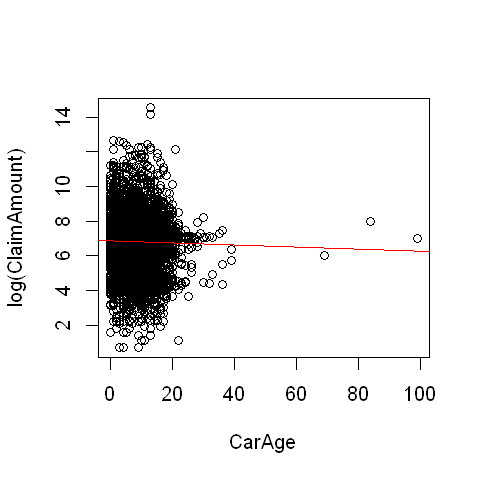

In [5]:
fit1 <- lm(log(ClaimAmount) ~ CarAge, data=data)
summary(fit1)

options(repr.plot.width=4, repr.plot.height=4)
plot(log(ClaimAmount) ~ CarAge, data=data)
abline(fit1, col='red')

## Model 2


Call:
lm(formula = log(ClaimAmount) ~ DriverAge, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1612 -0.2802  0.2204  0.3081  7.7520 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.7361807  0.0277458 242.782  < 2e-16 ***
DriverAge   0.0020374  0.0005868   3.472 0.000518 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.115 on 16179 degrees of freedom
Multiple R-squared:  0.0007446,	Adjusted R-squared:  0.0006828 
F-statistic: 12.06 on 1 and 16179 DF,  p-value: 0.0005177


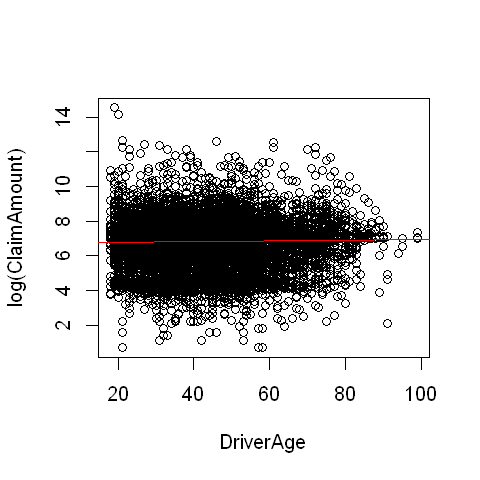

In [6]:
fit2<-lm(log(ClaimAmount) ~ DriverAge, data=data)
summary(fit2)

plot(log(ClaimAmount) ~ DriverAge, data=data)
abline(fit2, col='red')

## Model 3

In [7]:
fit3 <- lm(log(ClaimAmount) ~ CarAge + DriverAge + Gas, data=data)
summary(fit3)


Call:
lm(formula = log(ClaimAmount) ~ CarAge + DriverAge + Gas, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1851 -0.2769  0.2191  0.3213  7.7861 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.7907967  0.0318860 212.971  < 2e-16 ***
CarAge      -0.0054715  0.0016895  -3.239  0.00120 ** 
DriverAge    0.0019187  0.0005892   3.257  0.00113 ** 
GasRegular  -0.0153495  0.0177060  -0.867  0.38600    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.114 on 16177 degrees of freedom
Multiple R-squared:  0.001495,	Adjusted R-squared:  0.00131 
F-statistic: 8.076 on 3 and 16177 DF,  p-value: 2.258e-05


## Model 4


Call:
lm(formula = log(ClaimAmount) ~ . + log(DriverAge), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2441 -0.2659  0.2099  0.4056  7.5235 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              8.355e+00  3.556e-01  23.495  < 2e-16
PolicyID                                 4.640e-07  7.734e-08   5.999 2.03e-09
ClaimNb                                  2.630e-02  2.692e-02   0.977  0.32866
Exposure                                -3.535e-01  2.911e-02 -12.141  < 2e-16
Powere                                   1.753e-02  3.107e-02   0.564  0.57261
Powerf                                   3.014e-02  3.025e-02   0.997  0.31899
Powerg                                   3.342e-02  3.000e-02   1.114  0.26526
Powerh                                   3.584e-02  4.299e-02   0.834  0.40448
Poweri                                   8.122e-02  4.755e-02   1.708  0.08768
Powerj                       

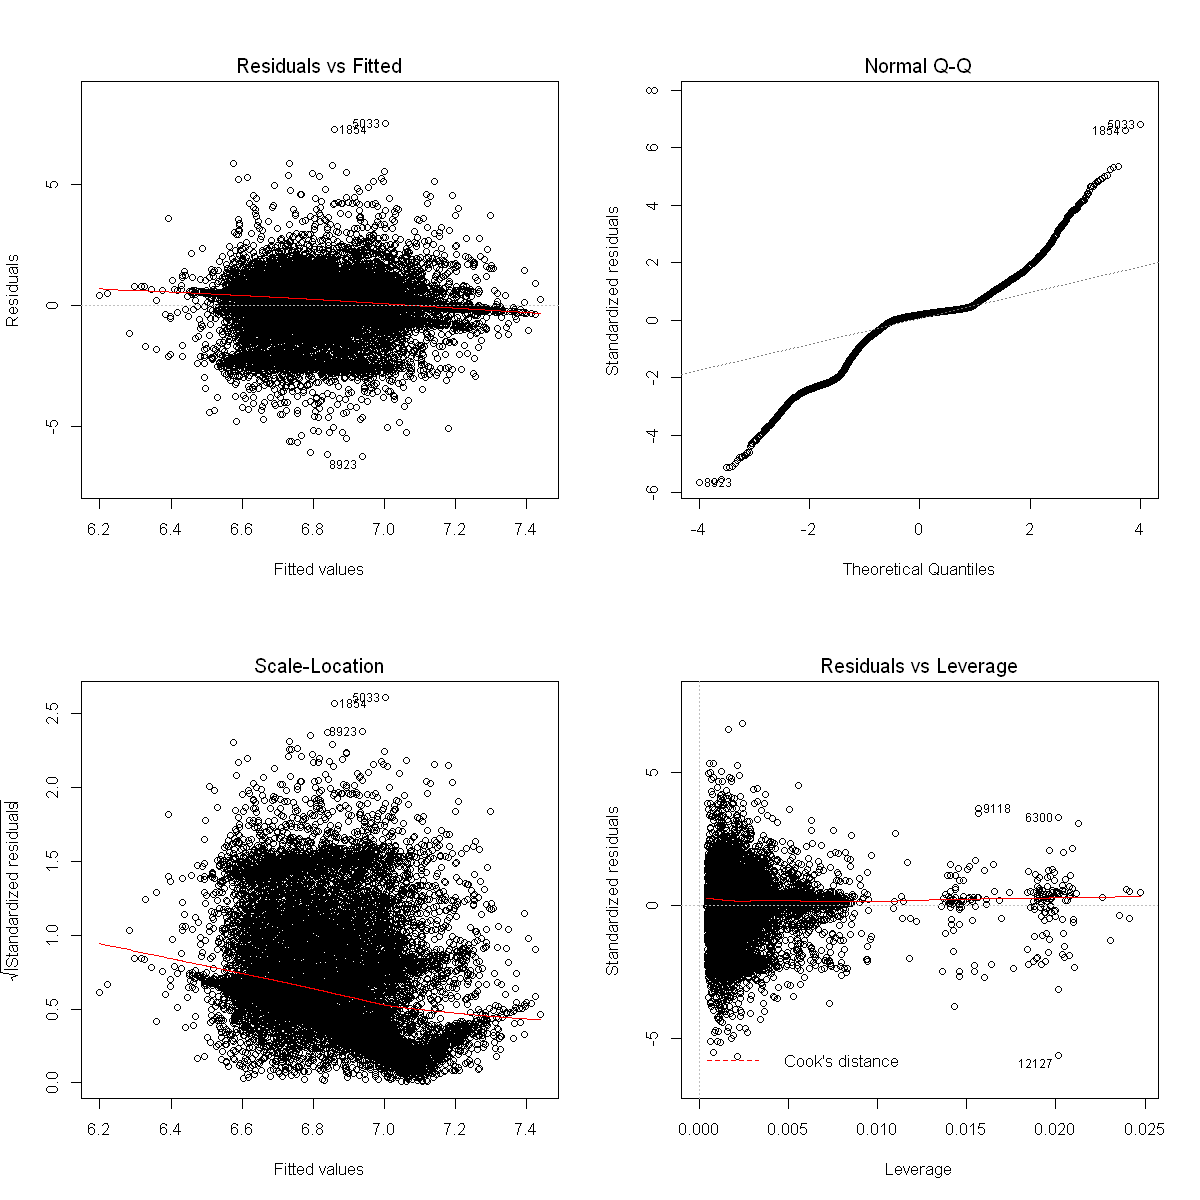

In [8]:
fit4 <- lm(log(ClaimAmount) ~ . + log(DriverAge), data=data)
summary(fit4)

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2))
plot(fit4)

## Resources
* [Rounding numbers in R](https://www.dummies.com/programming/r/how-to-round-off-numbers-in-r/)